In [ ]:
# Numerical operations
import numpy as np

# Simple neural network package (used for classic neural networks)
import neurolab as nl

# Visualization
import matplotlib.pyplot as plt

# For splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Data manipulation and loading
import pandas as pd

# Deep learning libraries (Keras)
from tensorflow.keras.models import Sequential       # For creating a linear stack of layers
from tensorflow.keras.layers import Dense            # Fully connected neural network layer
from tensorflow.keras.optimizers import Adam         # Optimization algorithm

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Enhanced data visualization
import seaborn as sns


In [18]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Remove any rows with missing values
data = data.dropna()

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the feature variables (excluding the target 'Outcome')
X = scaler.fit_transform(data.drop('Outcome', axis=1))

# Set the target variable
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Create a Sequential neural network model
model = Sequential()

# Input layer with 12 neurons and ReLU activation
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with 8 neurons and ReLU activation
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy as a performance metric
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\worka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the neural network model
# - epochs: number of complete passes through the training data
# - batch_size: number of samples processed before the model is updated
# - validation_data: data used to evaluate the model during training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
# - The output is a probability; we convert it to binary (0 or 1) using a 0.5 threshold
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6660 - loss: 0.6546 - val_accuracy: 0.6364 - val_loss: 0.6561
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6499 - loss: 0.6476 - val_accuracy: 0.6364 - val_loss: 0.6316
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6910 - loss: 0.5969 - val_accuracy: 0.6364 - val_loss: 0.6123
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6316 - loss: 0.6051 - val_accuracy: 0.6429 - val_loss: 0.5961
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6486 - loss: 0.5892 - val_accuracy: 0.6494 - val_loss: 0.5834
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6764 - loss: 0.5635 - val_accuracy: 0.6623 - val_loss: 0.5729
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7087 - loss: 0.5364 - val_accuracy: 0.6948 - val_loss: 0.5633
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7056 - loss: 0.5165 - val_accuracy: 0.7143 - val_lo

In [ ]:
# Evaluate the model on the test set and get the loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy with 4 decimal places
print(f"Accuracy: {test_accuracy:.4f}")


Accuracy: 0.7597


Klasifikační zpráva pro neuronovou síť:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



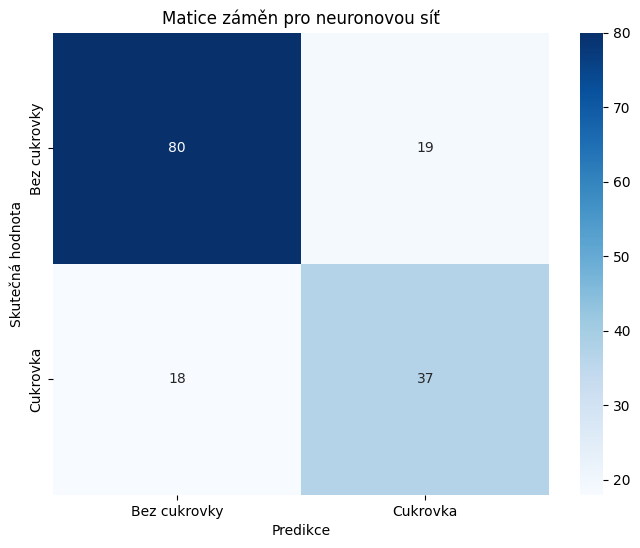

In [ ]:
# Classification report for the neural network
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred))

# Confusion matrix for the neural network
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix for Neural Network")
sns.heatmap(
    conf_matrix,
    annot=True,
    cmap='Blues',
    fmt='d',
    xticklabels=['No Diabetes', 'Diabetes'],
    yticklabels=['No Diabetes', 'Diabetes']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


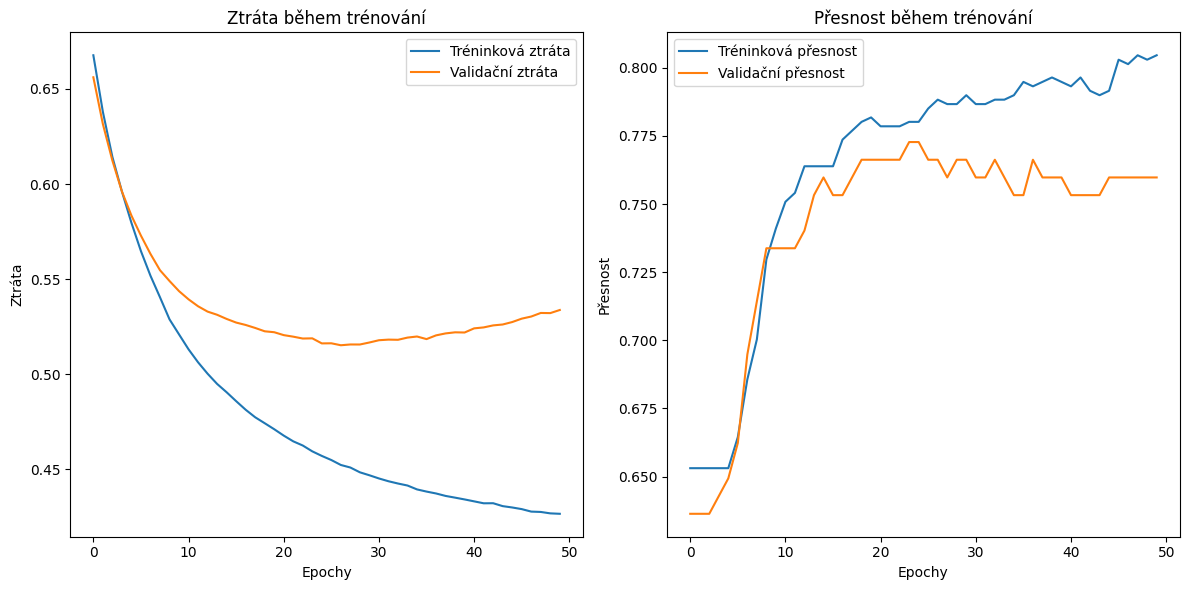

In [ ]:
# Plot training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss During Training")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy During Training")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
